# Worksheet 12

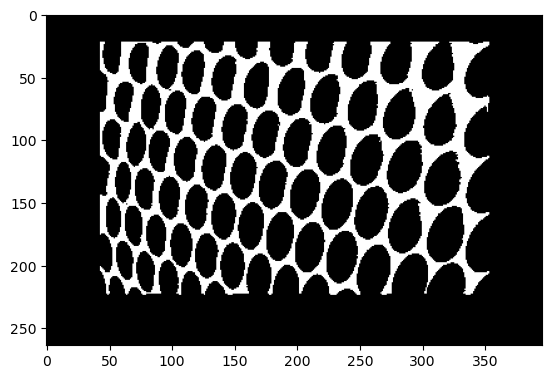

54
51


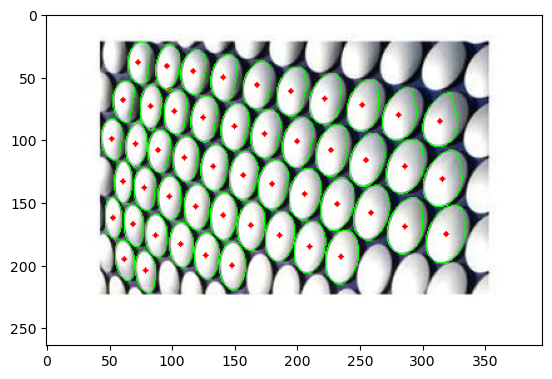

In [8]:
import cv2
import matplotlib.pyplot as plt

# Read Image:
image = cv2.imread("./lines.jpg")

# Convert to RGB:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to Grayscale:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Convert to Binary:
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')
plt.show()

# Find the Contours from the binary Image:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

count = 0
for c in contours:
    area = cv2.contourArea(c)
    if area > 3 and area < 5000:
        M = cv2.moments(c)
        cX = int(M['m10']/M['m00'])
        cY = int(M['m01']/M['m00'])
        hull = cv2.convexHull(c)
        cv2.circle(image, (cX,cY), 2, (255,0,0), -1)
        cv2.drawContours(image, [hull], 0, (0,255,0))
        count+=1

print(count)
plt.imshow(image)
plt.show()